# Статистика, DS-поток
## Практическое задание 3


**Правила:**

* Дедлайн **28 сентября 16:00**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ad21_bot`.
* Прислать нужно ноутбук в формате `ipynb`.
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Публикация решения может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него.
* Никакой код из данного задания при проверке запускаться не будет.

**Баллы за задание:**

* Задача 1 &mdash;  5 баллов
* Задача 2 &mdash;  15 баллов

**Важность задач:**

* *высокая:* задача 1;
* *средне-высокая:* задача 2.

In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

%matplotlib inline

_______
## Задача 1.
Дана параметрическая модель и 3 выборки, состоящие из 2-3 наблюдений. Для удобства, выборки представлены в виде python-кода — каждая выборка записана как список ее элементов; множество выборок представлено как список списков, соответствующих выборкам из множества. Нужно для каждой выборки построить график функции правдоподобия.

*a).* Параметрическая модель $\mathcal{N}(\theta, 1)$, выборки: `[[-1, 1], [-5, 5], [-1, 5]]`

*b).* Параметрическая модель $Exp(\theta)$, выборки: `[[1, 2], [0.1, 1], [1, 10]]`

*c).* Параметрическая модель $U[0, \theta]$, выборки: `[[0.2, 0.8], [0.5, 1], [0.5, 1.3]]`

*d).* Параметрическая модель $Bin(5, \theta)$, выборки: `[[0, 1], [5, 5], [0, 5]]`

*e).* Параметрическая модель $Pois(\theta)$, выборки: `[[0, 1], [0, 10], [5, 10]]`

*f).* Параметрическая модель $Сauchy(\theta)$, где $\theta$ — параметр сдвига, выборки: `[[-0.5, 0.5], [-2, 2], [-4, 0, 4]]`

Выполнить задание, не создавая много кода, поможет следующая функция.

In [2]:
def draw_likelihood(density_function, grid, samples, label):
    '''
    Изображает график функции правдоподобия для каждой из 3 выборок.
    
    Аргументы:
        density_function --- функция, считающая плотность 
            (обычную или дискретную). На вход данная функция 
            должна принимать массив размера (1, len_sample)
            и возвращать массив размера (len_grid, len_sample).
        grid --- массив размера (len_grid, 1), являющийся 
                 сеткой для построения графика;
        samples --- три выборки;
        label --- latex-код параметрической модели.
    '''
    
    assert len(samples) == 3, "Число выборок не равно 3."

    plt.figure(figsize=(18, 5))
    for i, sample in enumerate(samples):
        sample = np.array(sample)[np.newaxis, :]
        likelihood = np.prod(density_function(sample),axis=1)

        plt.subplot(1, 3, i+1)
        plt.plot(grid, likelihood)
        plt.xlabel('$\\theta$', fontsize=16)
        plt.grid(ls=':')
        plt.title(label + ', sample=' + str(sample), fontsize=16)
    plt.show()

Первый пункт можно выполнить с помощью следующего кода:

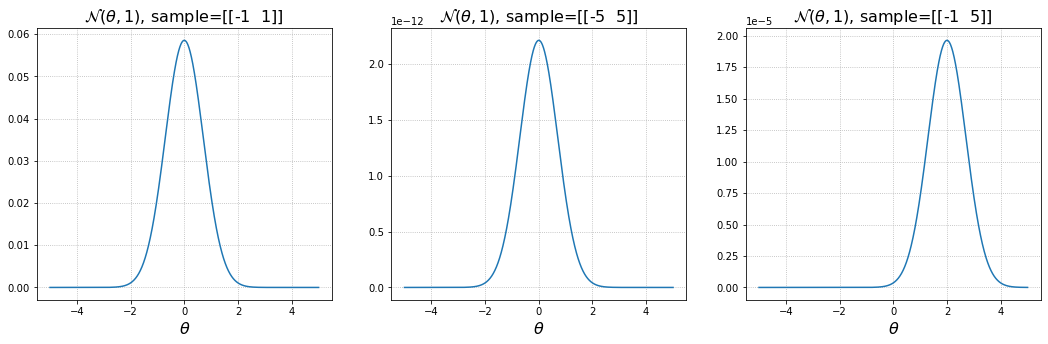

In [3]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.norm(loc=grid).pdf, grid, 
                [[-1, 1],[-5, 5],[-1, 5]], '$\\mathcal{N}(\\theta, 1)$')

Выполните остальные:

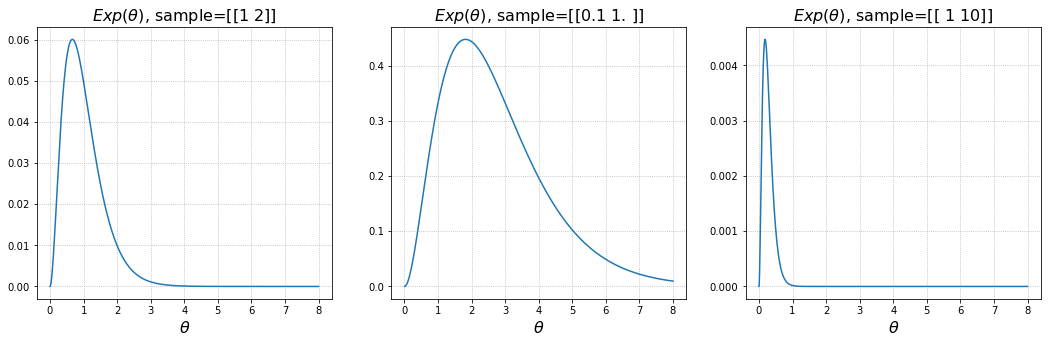

In [4]:
grid = np.linspace(1e-5, 8, 1000).reshape((-1, 1))
draw_likelihood(sps.expon(scale=1/grid).pdf, grid, 
                [[1, 2], [0.1, 1], [1, 10]], '$Exp(\\theta)$')

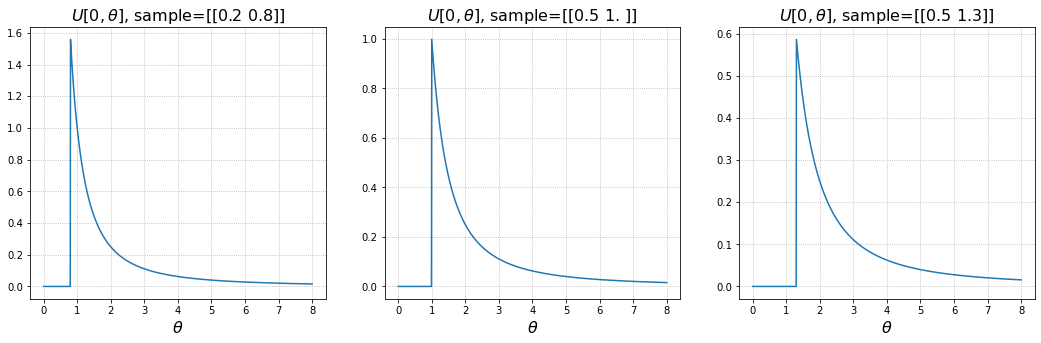

In [5]:
grid = np.linspace(1e-5, 8, 1000).reshape((-1, 1))
draw_likelihood(sps.uniform(loc=0,scale=grid).pdf, grid, 
                [[0.2, 0.8], [0.5, 1], [0.5, 1.3]], '$U[0,\\theta]$')

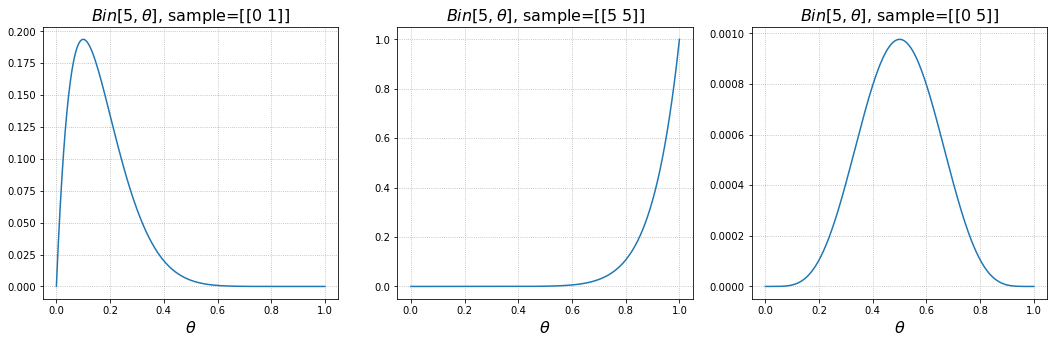

In [6]:
grid = np.linspace(0, 1, 1000).reshape((-1, 1))
draw_likelihood(sps.binom(n=5,p=grid).pmf, grid, 
                [[0, 1], [5, 5], [0, 5]], '$Bin[5,\\theta]$')

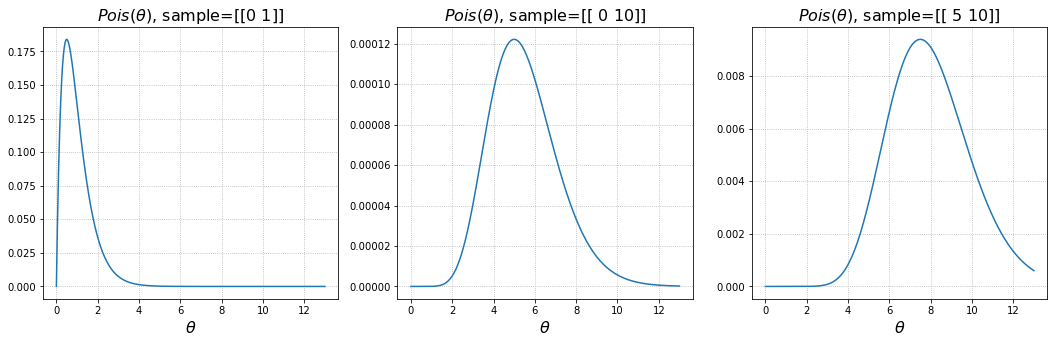

In [7]:
grid = np.linspace(0, 13, 1000).reshape((-1, 1))
draw_likelihood(sps.poisson(grid).pmf, grid, 
               [[0, 1], [0, 10], [5, 10]], '$Pois(\\theta)$')

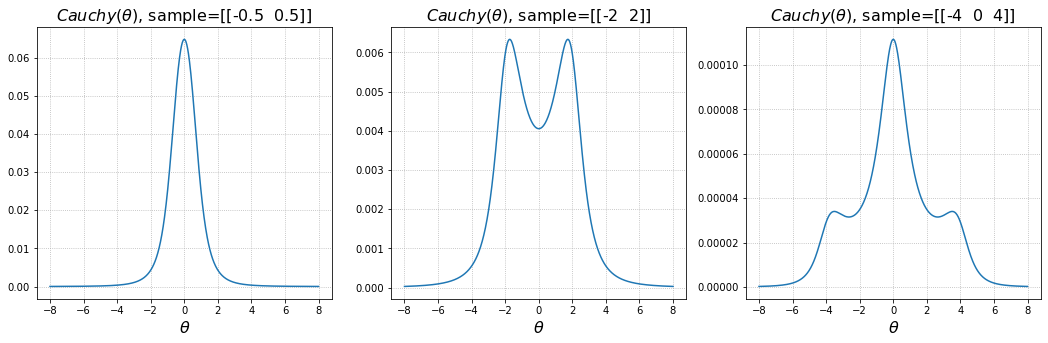

In [8]:
grid = np.linspace(-8, 8, 1000).reshape((-1, 1))
draw_likelihood(sps.cauchy(loc=grid).pdf, grid, 
               [[-0.5, 0.5], [-2, 2], [-4, 0, 4]], '$Сauchy(\\theta)$')

Прокомментируйте полученные графики. Сделайте вывод о том, как функция правдоподобия для каждой модели зависит от выборки. Является ли функция правдоподобия плотностью?

**Вывод:**
Каждая функция правдоподобия хорошо иллюстрирует основные св-ва каждого распределения и выборки. Например, при стандартном нормальном распределении и выборке [-1,1], мы пониаем, что argmax(f)=0 (так как матож у выборки равен 0), а если выборка [-1,5] то матож равен 2, таким образом argmax(f) тоже должен быть равен 2. Но вообще у станлартного нормального распределения ОМП=$(X.mean(),S^2)$, так что омп выглядит как плотность.

Также функция правдоподобия при равномерном распределение [0,theta] зависит от порядковой статистики. То есть функция правдоподобия равна 0, пока theta меньше X_(n), затем у нас резко скачок и дальше плавное уменьшение, что отлично видно на графиках.

У экспотенциального распределения омп равна $\frac{1}{x.mean()}$, так что это тоже хорошо видно на графиках (надо смотреть на пик графика)

У пуассоновского распределения argmax равен x.mean(), это наглядно видно на графиках.
С распределением Коши больше всего проблем, так как в теор дз мы выводили для него омп при n=2, там возмозжы 1 или 3 экстремума. Это зависит от выборки (точнее нам надо, чтобы $D/4\geq0$. А так омп равно или ср арифметическому или $x_1+x_2+-\sqrt{(x_1+x_2)^2-1-x_1\cdot x_2}$. Так что на 2 графиках есть 3 экстремума, а на первом только один.

На некоторых распределениях функция правдоподобия очень похожа на плотность, например, нормальное, экспотенцаильное или биномиальное, но есть проблемы с нормировкой в любом случае, но в общем случае это не плотность. 

Про проблемы нормировки, надо привезти пример, в котором будет показываться, что наблюдается проблема с нормировкой.
Как хорошо видно на примере ниже интеграл не дает 1, хотя интеграл плотности по $\mathcal{R}$ должен давать 1. Мы также тут учитываем, что у нас $\theta>0$ должна быть.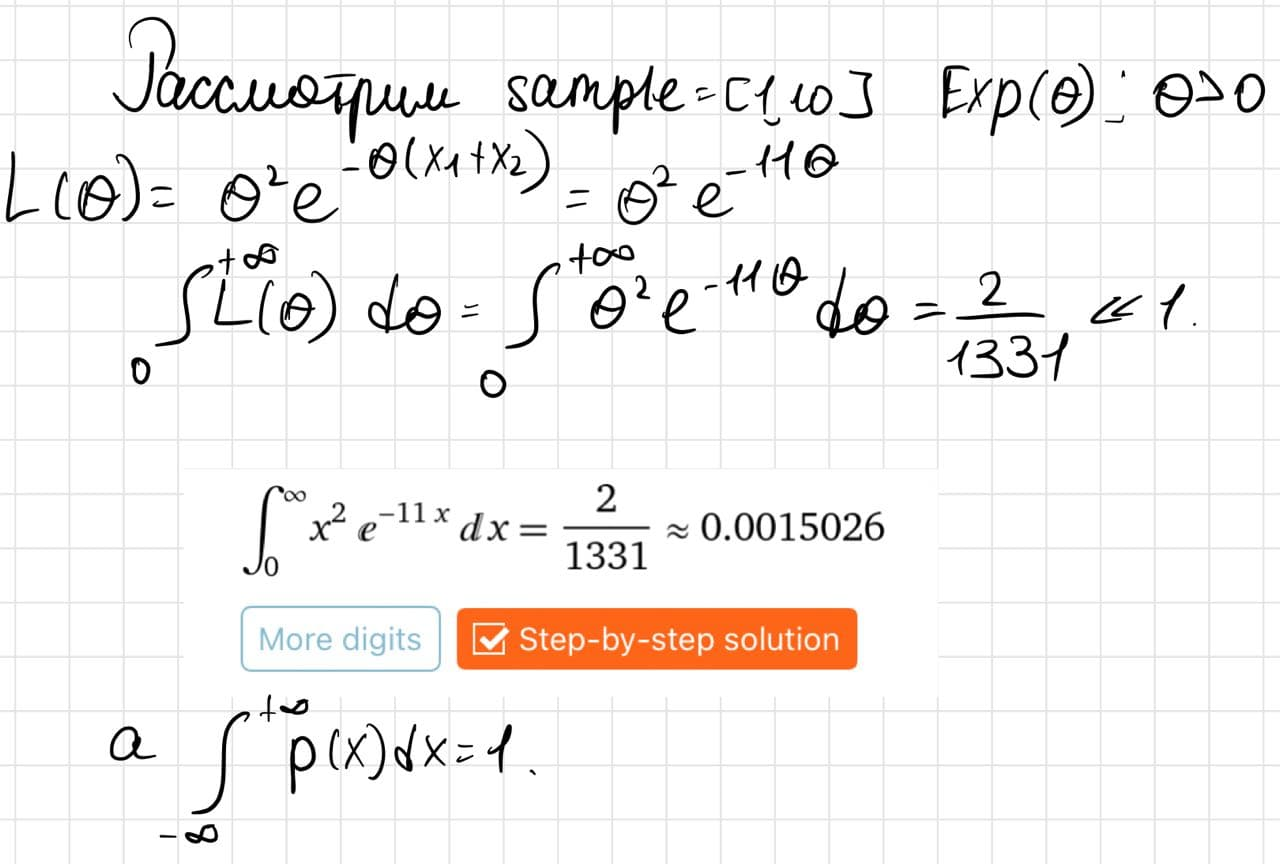

Вот мы привели пример, где действительно наблюдается проблема с нормировкой, что подтверждает то, что функция правдоподобия и плотность не равны.

Сгенерируем выборку большого размера из стандартного нормального распределения и посчитаем ее функцию правдоподобия в модели $\mathcal{N}(\theta, 1)$. Выполните код ниже:

In [9]:
sample = sps.norm.rvs(size=10**5)
likelihood = sps.norm.pdf(sample).prod()
print(likelihood)

0.0


Почему результат отличается от ожидаемого? Как обойти эту неприятность для подсчета оценки максимального правдоподобия? Реализуйте это.

*Подсказка:* нужно использовать некоторый метод класса, реализующий это распределение

**Ответ на вопрос и описание метода решения проблемы:**

Проблема была в том, что плохо умножать много чисел, тем более, если они очень маленькие, так как есть погрешность при вычислении, например. Поэтому мы используем сумма log, вместо умножения блольшого кол-ва чисел. Так что в данной задаче log решает все проблемы


In [10]:
likelihood = np.log(sps.norm.pdf(sample)).sum()
print(likelihood)

-141721.11054146776


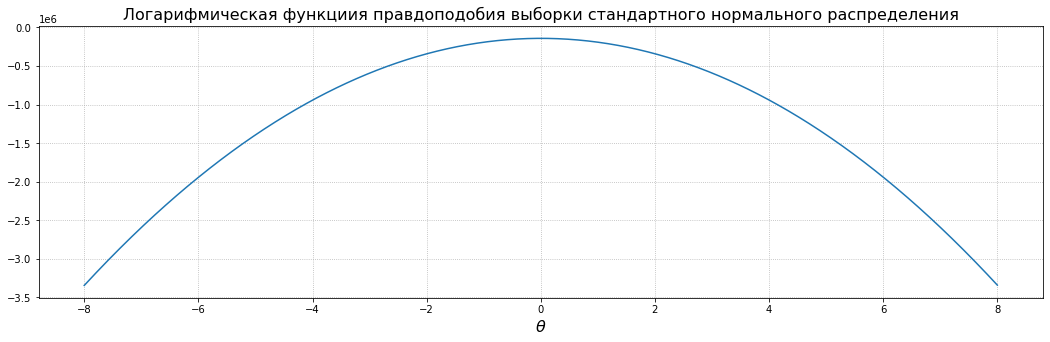

In [11]:
plt.figure(figsize=(18, 5))

grid = np.linspace(-8, 8, 1000).reshape((-1, 1))
likelihood = np.sum(sps.norm(loc=grid).logpdf(np.array(sample)[np.newaxis, :]),axis=1)

plt.plot(grid, likelihood)
plt.xlabel('$\\theta$', fontsize=16)
plt.grid(ls=':')
plt.title('Логарифмическая функциия правдоподобия выборки стандартного нормального распределения', fontsize=16);

______
## Задача 2. 
Компания выпустила $n$ серверов новой модели с увеличенным сроком службы. До начала продаж компания должна провести эксперимент по оценке среднего срока службы серверов. Известно, что сервера могут сломаться в любой момент независимо от того, сколько времени уже проработали. Таким образом, распределение времени работы сервера до поломки обладает свойством отсутствия памяти. Как вы знаете, таким свойством среди непрерывных распределений обладает только экспоненциальное распределение.

Компания начала проводить эксперимент, но сервера получились настолько хорошими, что многие еще не сломались, а бизнес уже требует запускать их продажи. Тем самым усложняется задача для аналитиков, которым приходит "обрезанная" выборка.

Рассмотрим задачу более формально. Пусть $X = (X_1, \ldots, X_n)$ &mdash; выборка из экспоненциального распределения с параметром $\theta$ с плотностью $p_\theta(x) = \theta e^{-\theta x}I\{x \geq 0\}$. \
При этом наблюдается выборка $Y = (Y_1, \ldots, Y_n)$, где, $Y_i$ определены следующим образом:
$$
\begin{equation}
  Y_i=\begin{cases}
    X_i, & \text{если $X_i \leq c$}.\\
    c, & \text{если $X_i > c$}.
  \end{cases}
\end{equation}
$$
Иначе говоря, $Y_i = \min(X_i, c)$, где $c$ &mdash; некоторая константа.
Выборка является смесью непрерывного и дискретного распределения, поэтому функция правдоподобия не определена. Вам предлагается реализовать и сравнить три подхода к оценке неизвестного параметра:
1. Рассмотреть подвыборку, состоящую из $Y_i < c$, и найти для нее ОМП. Учтите, что необходимо использовать условное распределение $Y_i$ при условии $Y_i < c$.
2. Найти оценку, используя метод моментов.
3. Найти ОМП по дискретизованной выборке, выполнив следующие действия.

    а) Разбить полуинтервал $[0, c)$ на $k$ бинов (множеств) вида $[a_i, a_{i+1})$, где $0=a_0<a_1<...<a_k=c$. В качестве границ бинов возьмите целые числа.
    
    б) Определить $Z_i$ как номер бина, в который попадает $Y_i$, считая при этом множество $\{c\}$ как $(k+1)$-й бин. Вам может помочь функция [`np.digitize`](https://numpy.org/doc/stable/reference/generated/numpy.digitize.html).
    
    в) Найти вероятности $p_j(\theta) = \mathsf{P}_\theta(Z_1 = j)$, которые определяют распределение $Z_i$, являющееся дискретным.
    
    г) Найти ОМП по выборке $Z_1, ..., Z_n$, используя ее распределение.

Рассмотрите $c = 10$, а в качестве истинного значения параметра возьмите $\theta = 0.15$. Обратите внимание на параметризацию в [`scipy.stats.expon`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html).
Получить точный ответ в виде формулы у вас скорее всего не получится, воспользуйтесь численными методами.

Насколько точным получается оценка в зависимости от подхода и размера выборки?

**Решение:**

In [12]:
#Давайте для начала сгенерим нужную выборку 
theta,c=0.15,10
sample = sps.expon(scale=1/theta).rvs(size=10**5)
grid = np.linspace(1e-5, 0.5, 1000).reshape((-1, 1))
#теперь надо превратить ее в выборку Y.
for i in range(len(sample)):
    if sample[i]>c:
        sample[i]=c


**1)** В данном пункте вся задача заключается в том, чтобы понять, с какой плотностью условного распределения нам надо работать.
А также нам надо удалить из выборки числа равные c=10

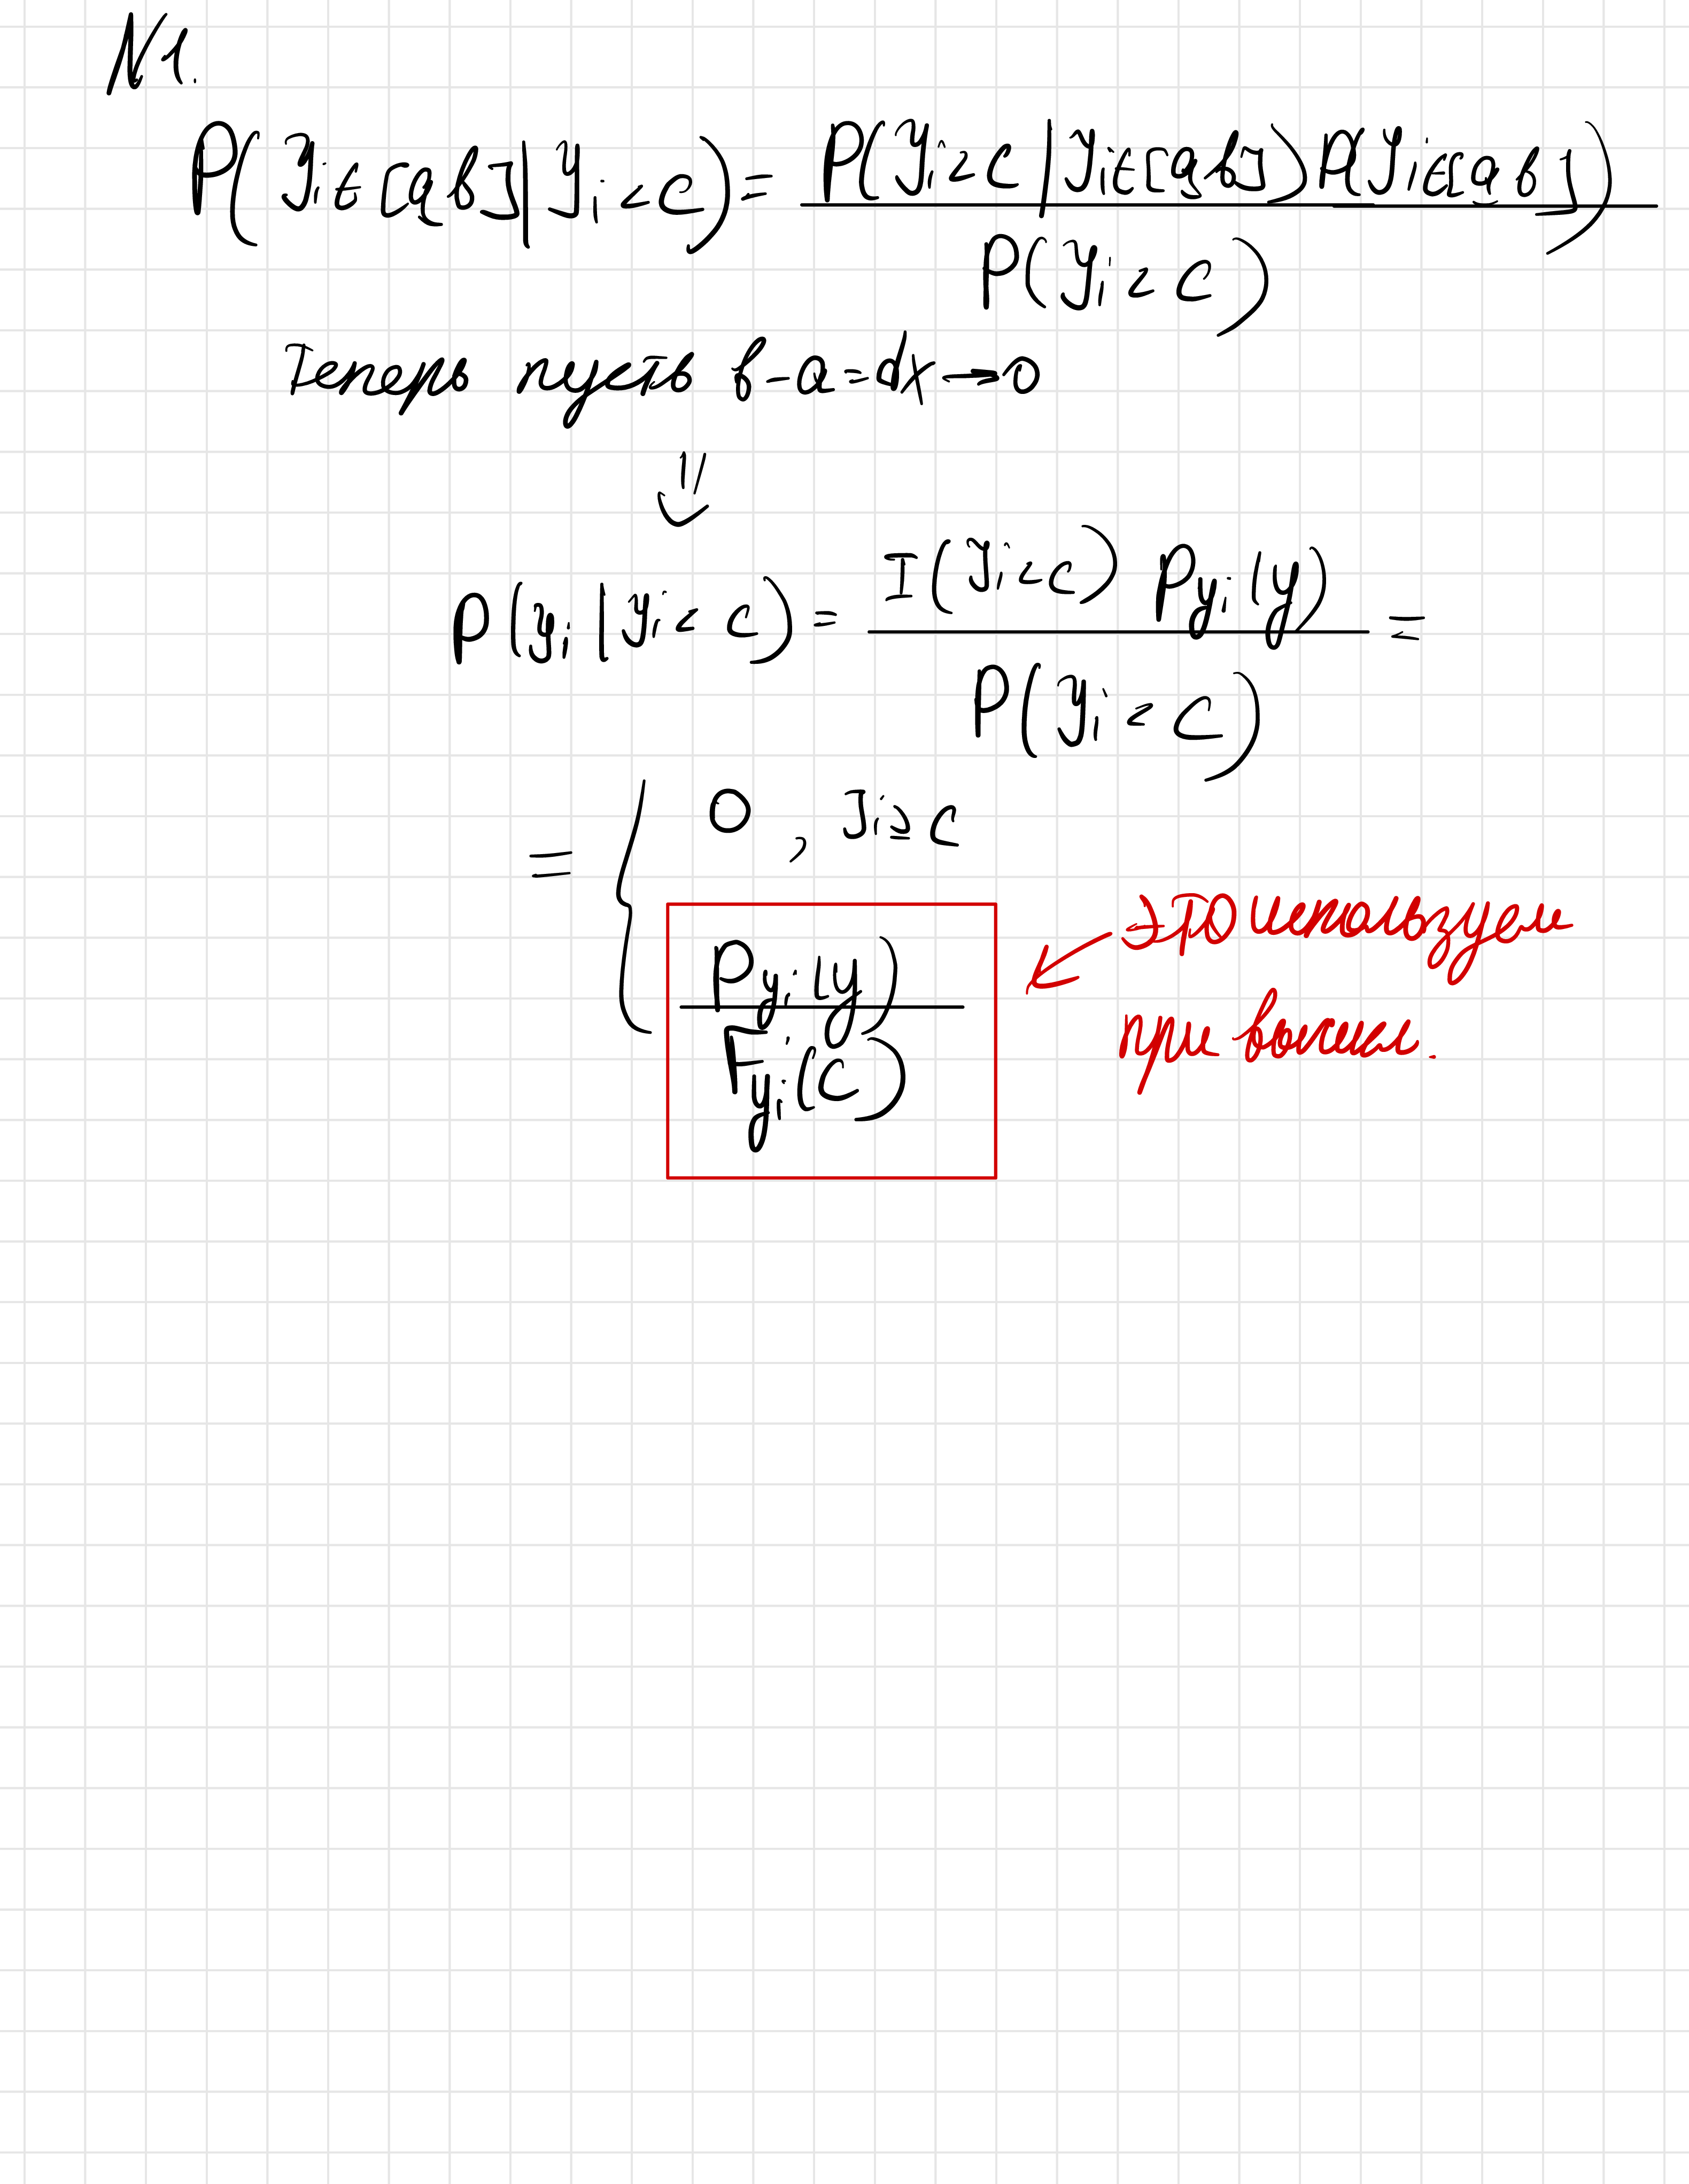

In [13]:
def mle(sample, grid):
    sample_less_c=sample[sample<c]
    density=np.array(sps.expon(scale=1/grid).pdf(np.array(sample_less_c)[np.newaxis, :]))/np.array(1-np.exp(-grid*c))
    likelihood = np.sum(np.log(density),axis=1)
    return (grid[np.argmax(likelihood)][0], likelihood)

print('ОМП подвыборки, состоящей из Y_i<c равна','%.6f' %mle(sample,grid)[0])

ОМП подвыборки, состоящей из Y_i<c равна 0.150157


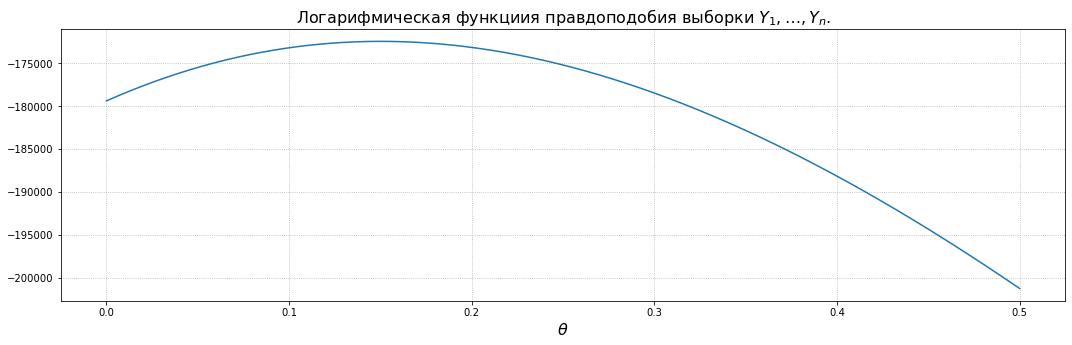

In [14]:
plt.figure(figsize=(18, 5))

plt.plot(grid, mle(sample,grid)[1])
plt.xlabel('$\\theta$', fontsize=16)
plt.grid(ls=':')
plt.title('Логарифмическая функциия правдоподобия выборки $Y_1,\ldots,Y_n.$', fontsize=16);

**2)** Найти оценку, используя метод моментов.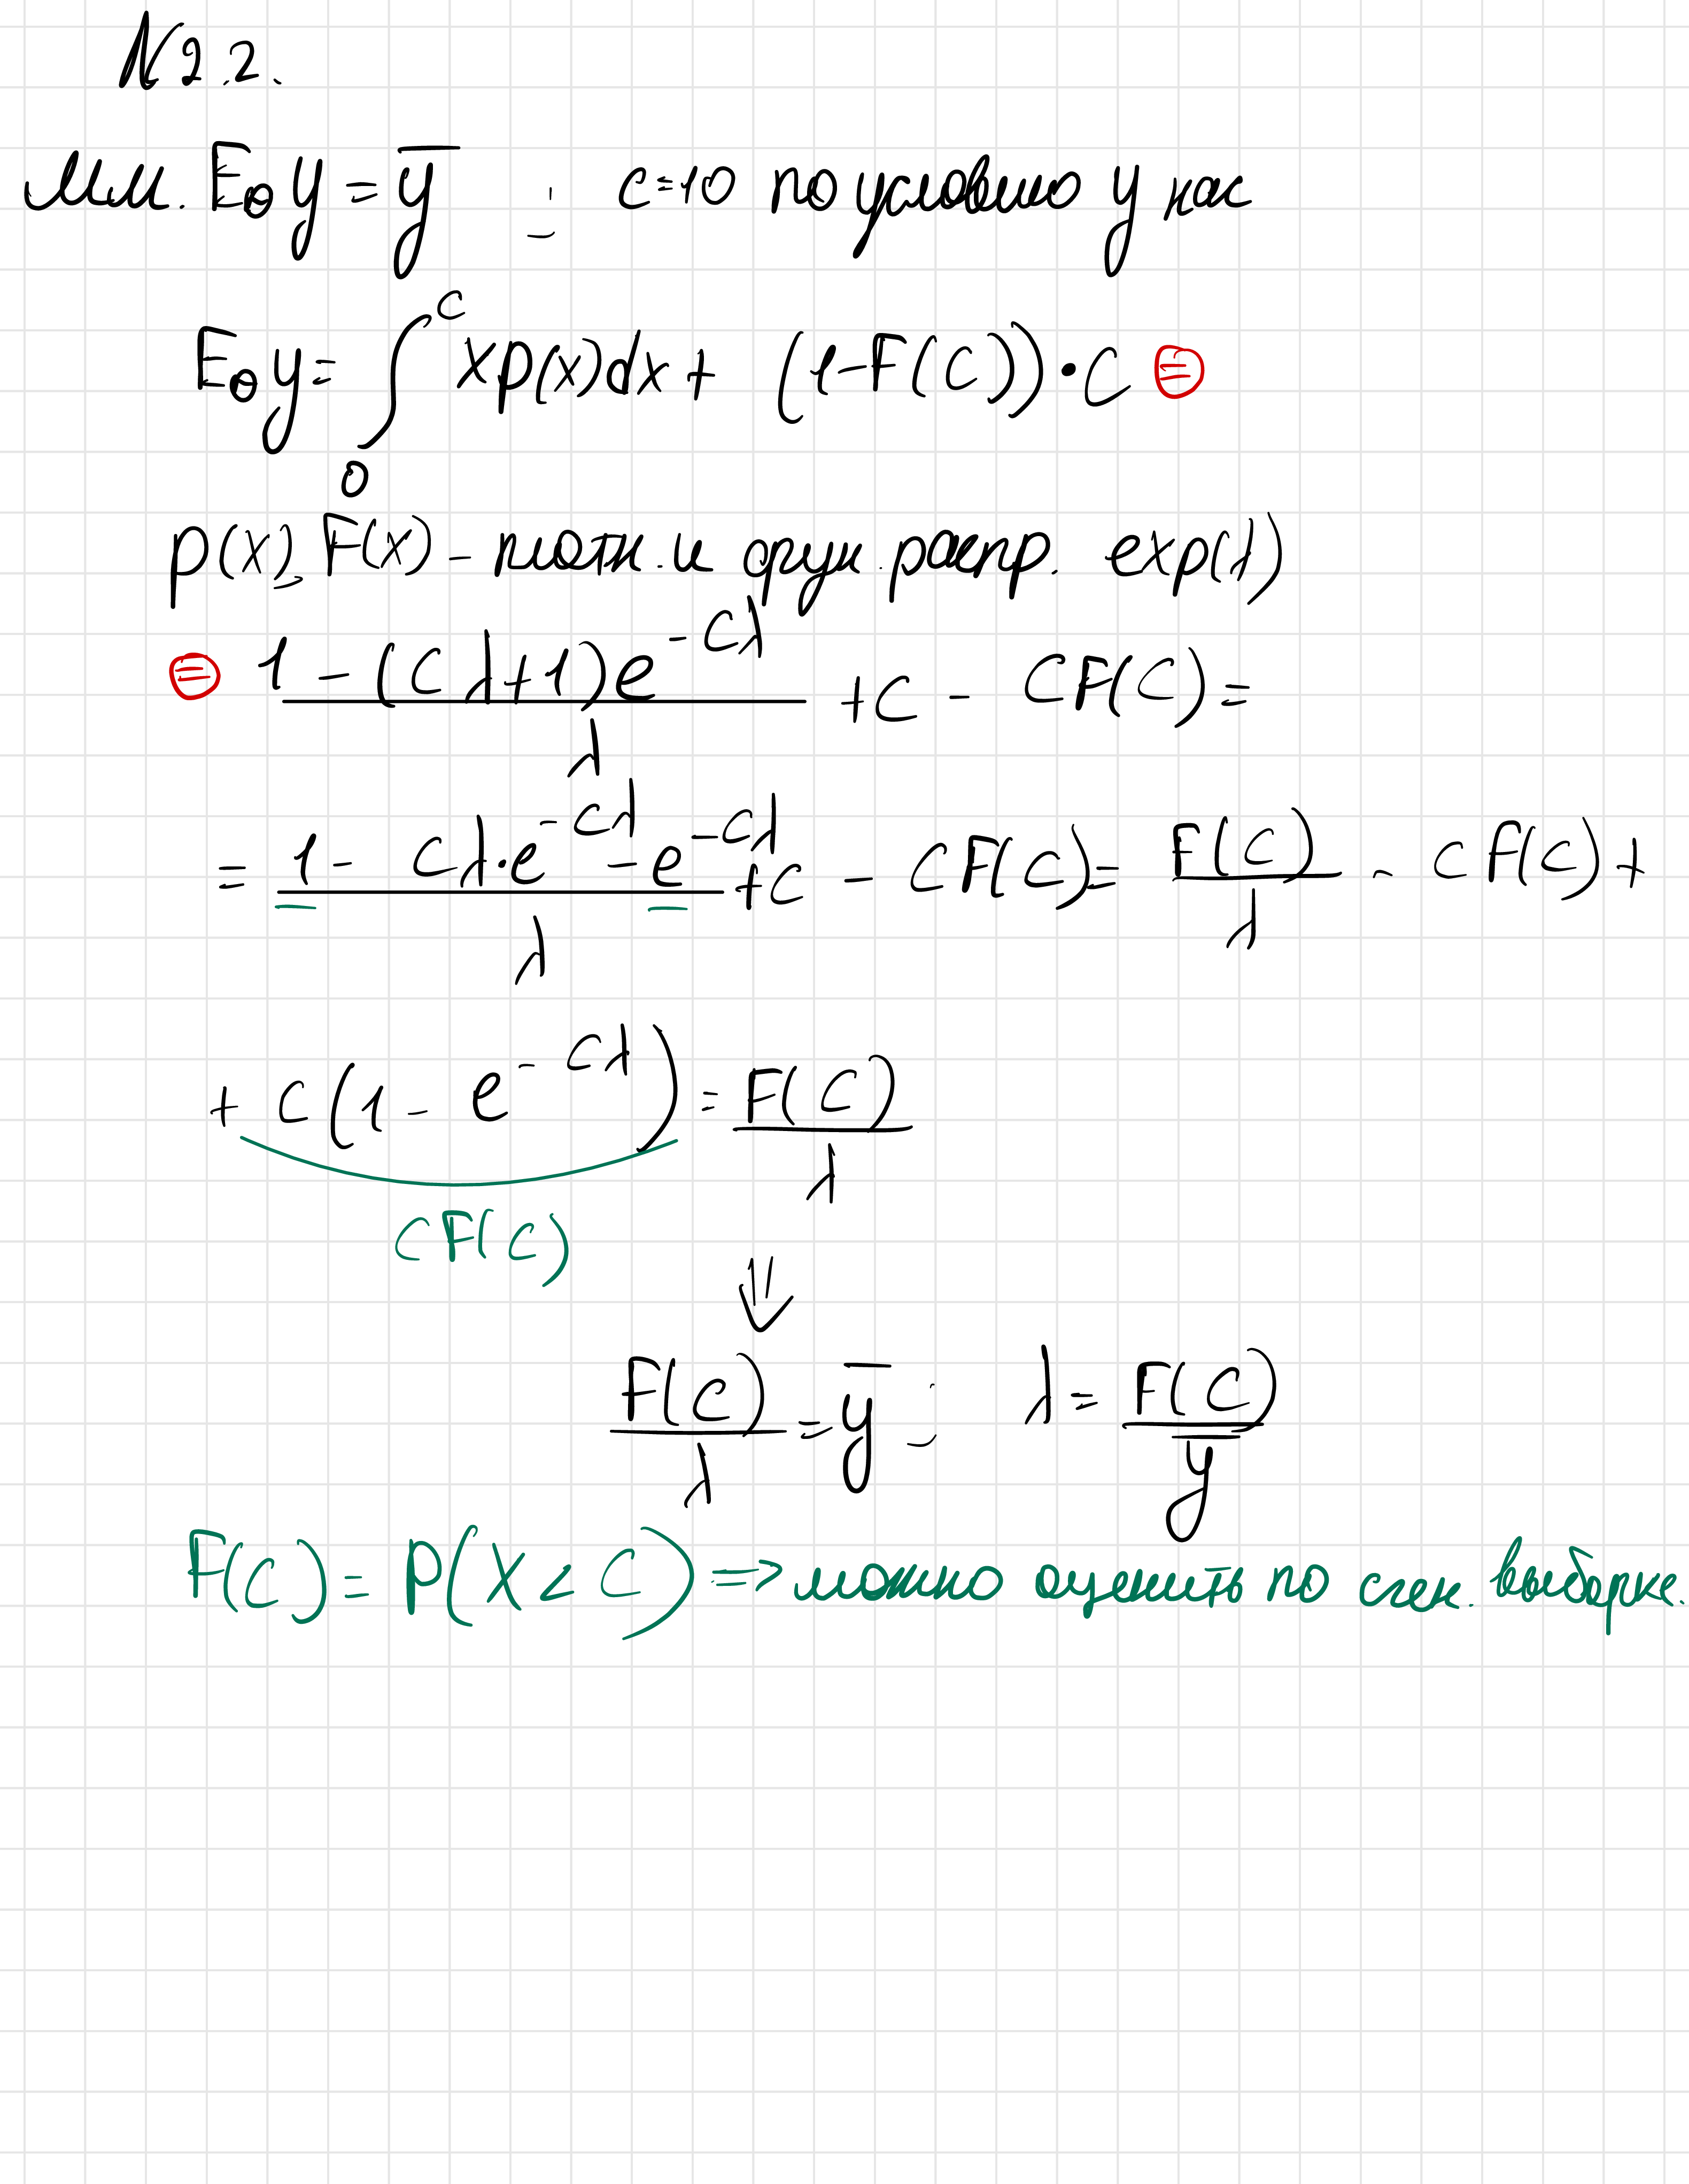

In [16]:
#теперь осталось только реализовать используя sample и sample_less_c
#F(c)=P(X<c)=len(sample_less_c)/len(sample)
y_mean=np.mean(sample)
sample_less_c=sample[sample<c]
F_c=len(sample_less_c)/len(sample)
print("Оценка, которую мы нашли используя метод моментов равна",'%.6f' %(F_c/y_mean))

Оценка, которую мы нашли используя метод моментов равна 0.150808


In [17]:
#данная реализация в виде функции
def method_moments_eval(sample):
    #size выборок каждый раз размера n     
    y_mean=np.mean(sample)
    len_sample_less_c=np.array([])
    for i in range(sample.shape[0]):
        len_sample_less_c=np.append(len_sample_less_c, len(sample[i][sample[i]<c]))
        
    return len_sample_less_c/(sample.shape[1])/y_mean

Теперь давайте сравним данную реализацию и реализацию, предложенную в реализации.

In [18]:
def grid_search_equation(
    func, from_theta, to_theta, 
    step=0.1, num_iter=10, **kwargs
):
    '''
    Поиск по локальной сетке с уменьшающимся шагом 
    корня уравнения f(theta) = 0.
    
    Аргументы:
    func --- функция, корень которой ищется;
    from_theta --- минимильное значение параметра;
    to_theta --- максимальное значение параметра;
    step --- начальный шаг сетки;
    num_iter --- количество итераций.
    
    Возвращает:
    result_theta --- найденный ноль уравнения f(theta) = 0.
    '''
    
    result_theta = 0
    
    for i in range(num_iter):
        # задаем сетку
        grid = np.mgrid[from_theta:to_theta:step]
        f_values = func(grid, **kwargs)
        # находим текущее приближение
        max_index = np.argmin(np.abs(f_values))
        result_theta = grid[max_index]
        # обновление параметров сетки
        from_theta, to_theta = result_theta - step, result_theta + step
        step *= 0.1
        
    return result_theta

def moments_equation(theta, sample, C=10):
    '''
    Вычисление значения функции из уравнения моментов.
    '''
    return  (1 - np.exp(-C*theta)) / theta - sample.mean()


In [19]:
grid_search_equation(
    func=moments_equation, 
    from_theta=1e-10, 
    to_theta=1, 
    step=0.1, 
    num_iter=10, 
    sample=sample
)

0.15070746150000022

Предварительно результаты очень похожи.
Давайте теперь произведем само сравнение, возьмем 1000 выборок размеров 50, 5000, $10^5$
Каждым способом получим оценки, построим затем гистограмму полученного распределения и по ней мы уже скажем, какой способо лучше

In [47]:
count_sample=1000
size_sample_title=[50,500,5000]

sample1 = np.array(sps.expon(scale=1/theta).rvs(size=(count_sample,size_sample_title[0])))
sample1[sample1>=c]=c

sample2 = np.array(sps.expon(scale=1/theta).rvs(size=(count_sample,size_sample_title[1])))
sample2[sample2>=c]=c

sample3 = np.array(sps.expon(scale=1/theta).rvs(size=(count_sample,size_sample_title[2])))
sample3[sample3>=c]=c
all_sample=[sample1,sample2,sample3]

In [25]:
def diff_hist(res_method_1_50,res_method_2_50,name_title,label_1,label_2):
    plt.figure(figsize=(15, 7))
    plt.hist(res_method_1_50, color='red', label=label_1,bins=20, alpha=0.5)
    plt.hist(res_method_2_50, color='blue', label=label_2, bins=40, alpha=0.5)
    plt.axvline(theta, ymin=0,ymax=1, color='green', label='$\\theta=0.15$-истинный параметр')
    plt.title('Гистограмма ${}$ оценок $\\theta$ при $n={}$'.format(count_sample,name_title))
    plt.xlabel('$\widehat{\\theta}$')
    plt.grid()
    plt.legend();

In [28]:
res_method_moment_1=[]
res_method_moment_2=[]
for j,sample in enumerate(all_sample):
    res_method_1=np.array(method_moments_eval(sample))

    res_method_2=np.zeros(sample.shape[0])
    for i in (range(sample.shape[0])):
        res_method_2[i]=grid_search_equation(
        func=moments_equation, 
        from_theta=1e-10, 
        to_theta=1, 
        step=0.1, 
        num_iter=10, 
        sample=sample[i]
    )
    
    res_method_moment_1.append(res_method_1)
    res_method_moment_2.append(res_method_2)

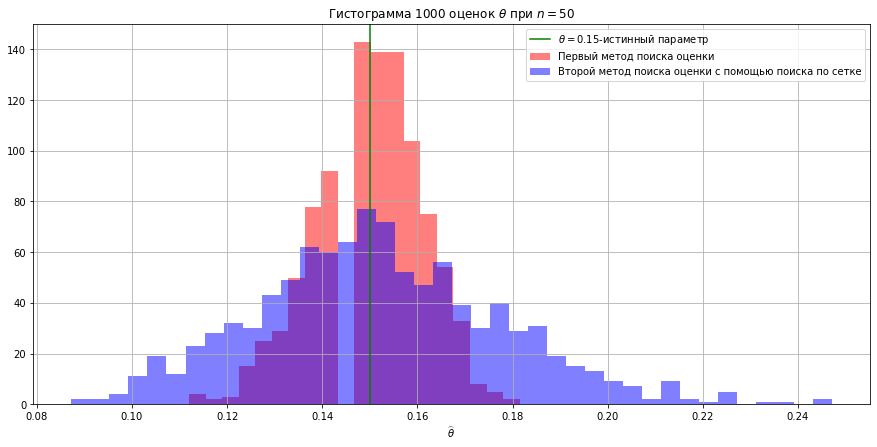

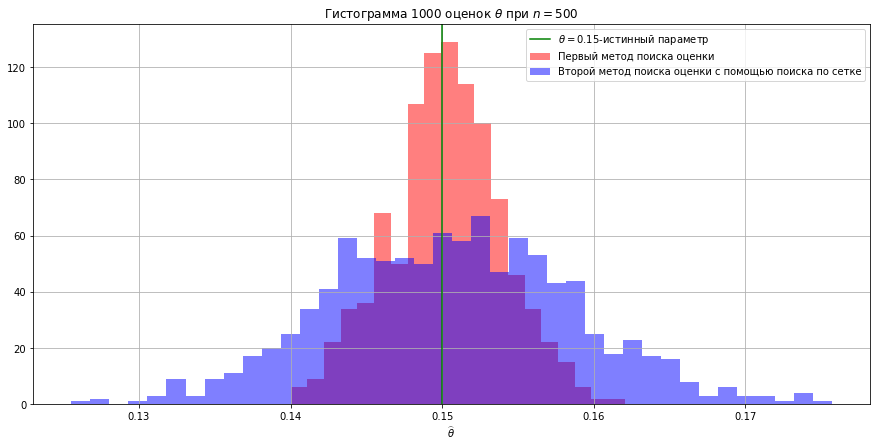

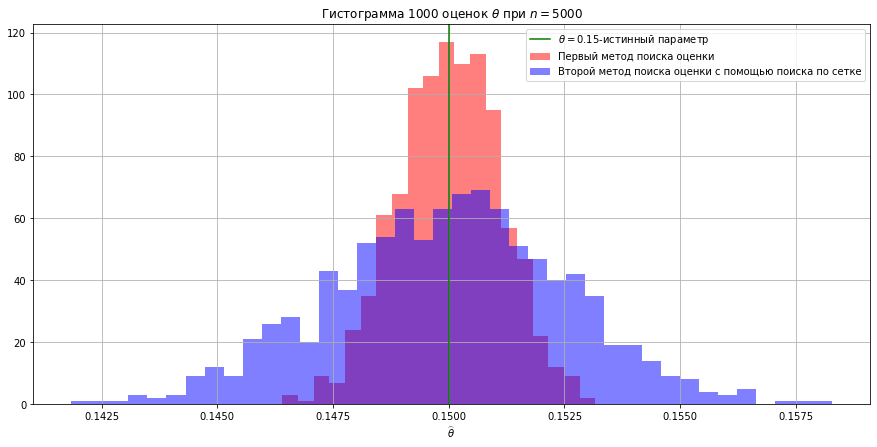

In [29]:
label_1="Первый метод поиска оценки"
label_2="Второй метод поиска оценки с помощью поиска по сетке"
for i in range(len(res_method_moment_1)):
    diff_hist(res_method_moment_1[i],res_method_moment_2[i],size_sample_title[i], label_1,label_2)

**Вывод** Мы сравнили два разных метода во втором пункте при разных выборках, а именно 50, 500,5000. Причем мы генерили 1000 выборок нужного размера. Как прекрасно видно первый метод в разы лучше, чем второй.

1) Количество оценок, которые более близкие к истинной оценке намного больше

2) Разброс оценок в разы меньше, это прекрасно видно на гистограммах. 

Все эти вещи наблюдаются при всех размерах выборки. Также у второго способа наблюдается большой минус-это время работы. Так как там работает поиск по сетке, но это занимает время, в то время как в первом способе делаются простые арифметические подсчеты.
Также хотел бы обратить внимание, что второй способ можно улучшить, если в сетке сделать шаг более маленьким, но надо понимать, что тогда время работы будет еще хуже. Тем самым мы получаем, что второй метод имеет более большой разброс оценок, меньшее количество оценок, приближенных к истинному, а также большее время работы. Таким образом получаем, что лучше использовать первый метод.

Теперь давайте сравним уже разные методы оценивания, то есть ОМП для подвыборки и первую реализацию методов моментов.

**1)** Давайте для них построим сначала при таких же n три гистограммы

**2)** Давайте построим график того, как зависят оценки, полученные каждым методом, от $n$

In [33]:
#установим нужную нам сетку
grid=np.linspace(1e-5, 1, 1000).reshape((-1, 1))

res_method_moment_1=[]
res_method_moment_2=[]

for j,sample in enumerate(tqdm(all_sample)):
    res_method_1=np.array(method_moments_eval(sample))

    res_method_2=np.zeros(sample.shape[0])
    for i in tqdm(range(sample.shape[0])):
        res_method_2[i]=mle(sample[i],grid)[0]
    
    res_method_moment_1.append(res_method_1)
    res_method_moment_2.append(res_method_2)

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

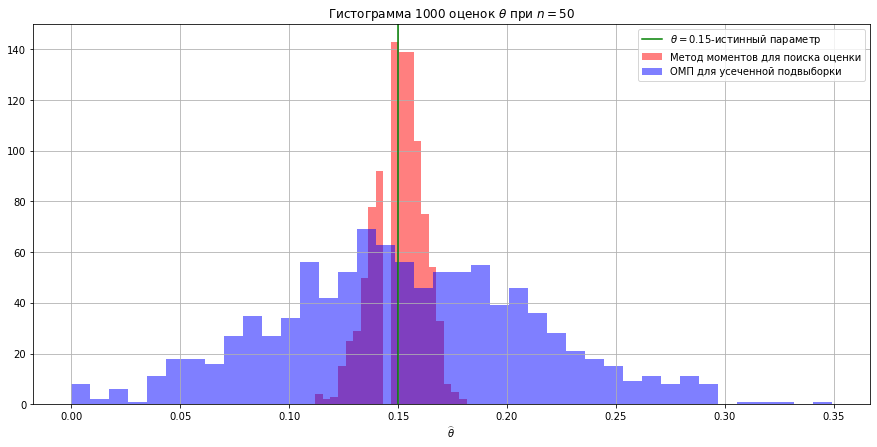

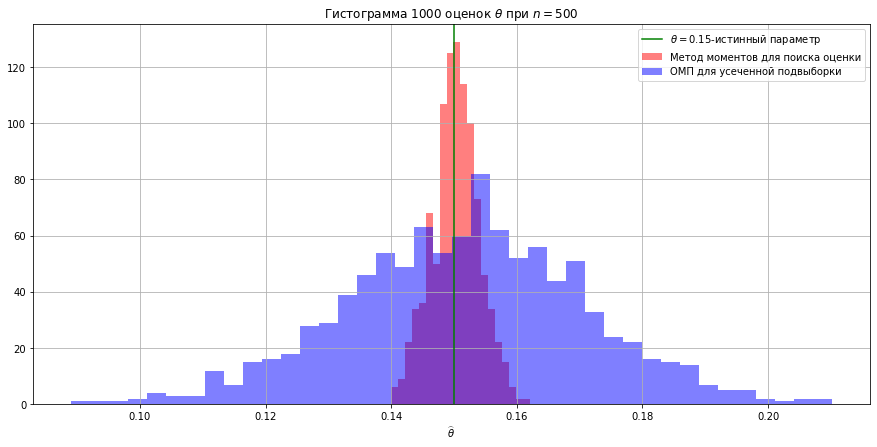

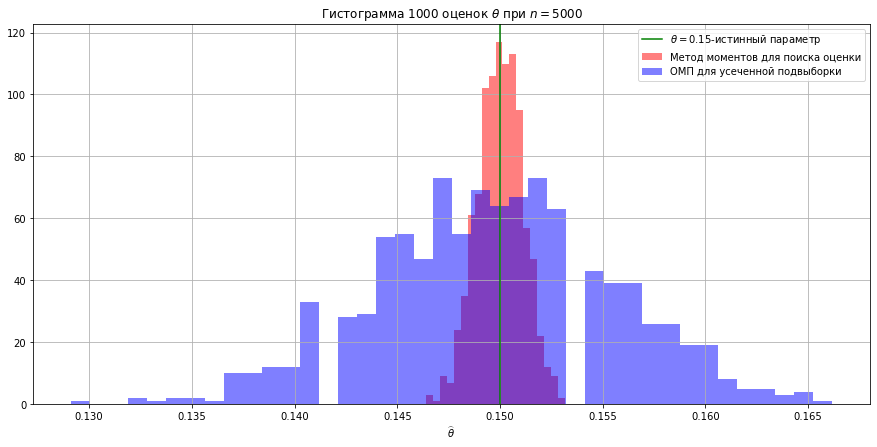

In [34]:
label_1="Метод моментов для поиска оценки"
label_2="ОМП для усеченной подвыборки"
for i in range(len(res_method_moment_1)):
    diff_hist(res_method_moment_1[i],res_method_moment_2[i],size_sample_title[i], label_1,label_2)

**Вывод** Тут мы тоже построили разные гистограммы при разных размерах выборки. Видно, что метод моментов намного лучше, чем ОМП для усеченной подвыборки, так как мы получаем намного больше более точных оценок, а также меньше разброс оценок. Есть две причины такого результата:

1) Мы рассчитывали условную плотность для первого пункта, но мы обрезали выборку, то есть мы выкинули часть данных, что сильно повлияло на итоговый ответ

2) Также в первом способе есть большой недостаток, он зависит от точности (шага) в нашей сетке. Но время работы первого способа и так очень долгое, поэтому увеличением сетки мы получим вообще непрактичный алгоритм. 

Но ключевая ошибка номер 1, так как сетка у нас была довольно точная с маленьким шагом.

Теперь давайте построим график того, как зависят оценки, полученные каждым методом, от $n$. Давайте будем использовать $n$=500, соответственно это наш sample2

In [48]:
#sample2=sample1
first_method_trace = np.zeros(sample2.shape)
second_method_trace = np.zeros(sample2.shape)
for n in tqdm(range(1,sample2.shape[1]+1)):
    for i in (range(sample2.shape[0])):
        first_method_trace[i, n-1] = mle(sample2[i, :n],grid)[0]
    second_method_trace[:,n-1]=method_moments_eval(sample2[:,:n])

  0%|          | 0/500 [00:00<?, ?it/s]

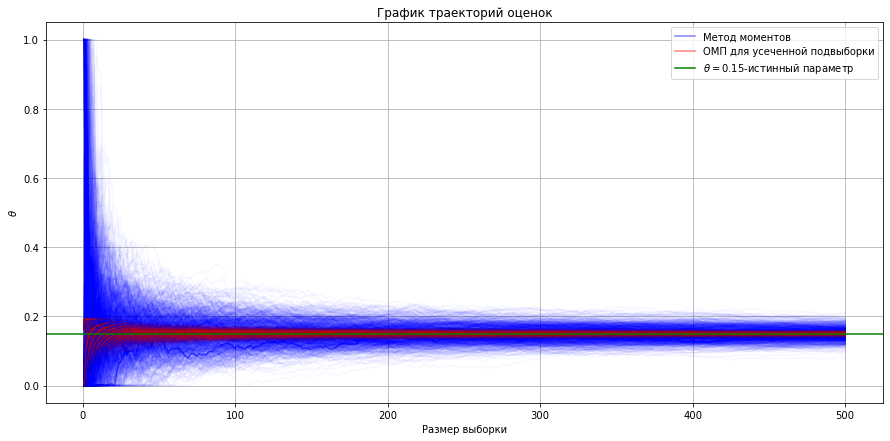

In [60]:
plt.figure(figsize=(15, 7))
plt.grid()
for i in range(first_method_trace.shape[0]):
    if i==0:
        plt.plot(range(1,sample2.shape[1]+1), first_method_trace[i,:], color='blue', alpha=0.5,
                 label='Метод моментов')
        plt.plot(range(1,sample2.shape[1]+1), second_method_trace[i,:], color='red', alpha=0.5,
                 label='ОМП для усеченной подвыборки')
    else:
        plt.plot(range(1,sample2.shape[1]+1), first_method_trace[i,:], color='blue', alpha=0.03)
        plt.plot(range(1,sample2.shape[1]+1), second_method_trace[i,:], color='red', alpha=0.03)
    
plt.title('График траекторий оценок')
plt.xlabel('Размер выборки')
plt.ylabel('$\\theta$')
plt.axhline(theta, xmin=0,xmax=1, color='green', label='$\\theta=0.15$-истинный параметр')
plt.legend();

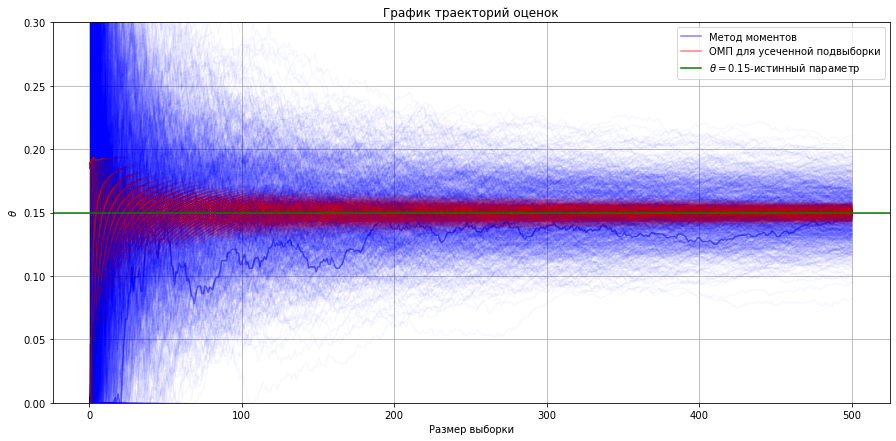

In [59]:
plt.figure(figsize=(15, 7))
plt.grid()
for i in range(first_method_trace.shape[0]):
    if i==0:
        plt.plot(range(1,sample2.shape[1]+1), first_method_trace[i,:], color='blue', alpha=0.5,
                 label='Метод моментов')
        plt.plot(range(1,sample2.shape[1]+1), second_method_trace[i,:], color='red', alpha=0.5,
                 label='ОМП для усеченной подвыборки')
    else:
        plt.plot(range(1,sample2.shape[1]+1), first_method_trace[i,:], color='blue', alpha=0.03)
        plt.plot(range(1,sample2.shape[1]+1), second_method_trace[i,:], color='red', alpha=0.03)
    
plt.title('График траекторий оценок')
plt.xlabel('Размер выборки')
plt.ylabel('$\\theta$')
plt.axhline(theta, xmin=0,xmax=1, color='green', label='$\\theta=0.15$-истинный параметр')
plt.legend()
plt.ylim(0,0.3);

**Вывод** Теперь мы же сравниваем 1 и 2 метод, но уже как они зависят от n, n_max=500 в нашем случае. Видно, что есть огромные выбросы у первого способа при маленьких n, но это неудивительно, так как мы плюс к маленькой выборке обрезаем ее часть и пытаемся по ней восстановить данные. В тоже время, как метод моментов даже при маленьких n более точен, хотя по своим меркам он не точен и становится более менее точен при n>30. Но выбросы метода моментов при маленьких n связаны с тем, что нам надо искать среднее выборки, а когда чисел совсем мало, то любой выброс кардинально меняет нашу оценку. Также наша сетка была от 0 до 1, поэтому все выбросы ОМП не выходят за границы 0 и 1

**3 пункт не реализован**

**3)**  Найти ОМП по дискретизованной выборке, выполнив следующие действия.

In [202]:
k=10
a_i=np.linspace(0,10,11)
a_i

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [203]:
z=np.digitize(sample,a_i)
z

array([1, 1, 6, ..., 5, 7, 4], dtype=int64)

In [204]:
#P(Z1=j)=F(j)-F(j-1), а эти функции распределения мы уже знаем
def P_j(j):
    return (np.exp(-theta*(j-1))-np.exp(-theta*j))